<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/Real_Estate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os

df = pd.read_csv('/content/sample_data/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [16]:
df.drop(['No', 'X1 transaction date'], inplace = True, axis = 1)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.rename(columns={"X2 house age": "House_Age", "X3 distance to the nearest MRT station": "Dist_to_nearest_MRT", "X4 number of convenience stores":"Number_of_stores", "X5 latitude":"Latitude", \
                  "X6 longitude" : "Longitude", "Y house price of unit area":"Price_per_unit"}, inplace = True)


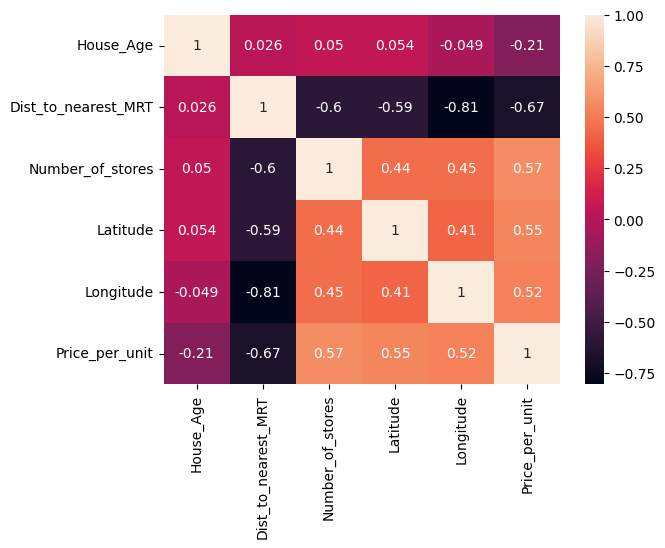

In [5]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [10]:
predictor = df[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores', 'Latitude','Longitude']]
target = df.Price_per_unit
x_train, x_test, y_train, y_test = train_test_split(predictor, target, train_size = 0.85)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.551917394273168

In [11]:
model.score(x_test, y_test)

0.6432589426602284

In [13]:
y_predict = model.predict(x_test)
summary = pd.DataFrame({'predicted':y_predict, 'test':y_test})
summary.head()

,predicted,test
190,42.103821,42.3
200,32.451529,25.5
99,52.515900,62.2
319,34.697498,26.9
3,47.016408,54.8


,predicted,test
count,63.000000,63.000000
mean,36.316279,33.919048
std,9.674931,12.079399
min,12.905551,12.800000
25%,32.425595,25.050000
50%,36.824266,31.700000
75%,42.580583,42.350000
max,52.515900,67.700000


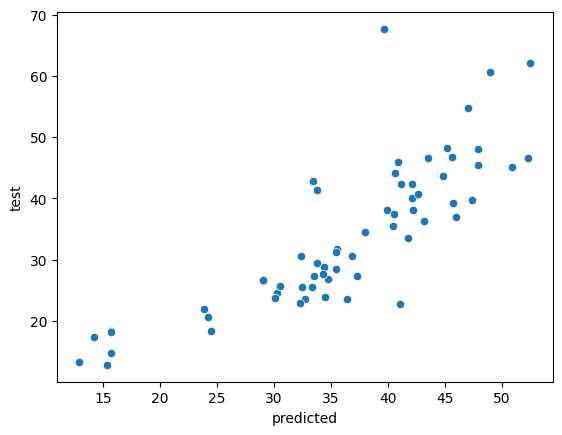

In [17]:
sns.scatterplot(summary, x = 'predicted', y = 'test')
summary.describe()